# Lab exercise #2: Credit scoring

**Task 1.**  
In class, I showed the iterative algorithm that finds the asset value and asset return volatility in the Merton model (you also find it in the Loeffler and Posch book, chapter 2). Have a look at the corresponding R code in the file "Merton model iterative ClassExample.R" that I uploaded.  
There is an alternative and simpler algorithm where you need to solve two non-linear equations, the Black and Scholes equation and an equation that links the volatility of asset returns to the volatility of equity returns. Read the file "Note on Merton Model.pdf" where you see both equations, with a derivation of the second.  
Your task is to write an R code that implements this alternative algorithm using the data of Enron in the file "merton data.csv". For this, you need the most recent observation of the book value of liabilities, the market value of equity (market capitalization) and the risk-free rate. In addition, you need to compute the equity volatility, i.e., the standard deviation of log returns of the market value of equity. Then you need to write down the two functions in the form $f(V_t, \sigma_V ) = 0$ and solve the system, for example, by using the R package nleqslv.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv('merton_data.csv',sep=';') #place the csv file in the same directory as the jupiter notebook

In [ ]:
df = df.dropna()
df.tail()

,Market equity E,Book liabilities L,risk-free rate r,S&P 500
257,28315.0,51652.0,0.034498,1179.21
258,28615.0,51652.0,0.034015,1161.51
259,27970.0,51652.0,0.033822,1148.56
260,26620.0,51652.0,0.033241,1129.03
261,26237.0,51652.0,0.034112,1133.58


In [ ]:
#data for the last date from the excel file merton.csv
#E=26237
#s_equity=0.4565
#L=51652
#rf_rate=0.0341

#T=1

In [ ]:
E = df['Market equity E'][len(df)-1]
L = df['Book liabilities L'][len(df)-1]
rf_rate = df['risk-free rate r'][len(df)-1]
#s_equity = np.sqrt(np.log(df['Market equity E'][0:]).pct_change().dropna().std()*(len(df))) ???
s_equity=0.4565
T = 1

In [ ]:
#import the necessary packages
import scipy.stats as ss
from scipy.optimize import minimize

In [ ]:
def calibration_function(x):
    """ Takes the two values in a form of a list, out of which
        first element of a list x[0] is the asset value , while
        second element of a list x[1] is the asset volatility.
        It returns a minimizing function.
        """
    #d1 in from Black sholes
    d1 = (np.log(x[0]/L) + (rf_rate + (x[1]**2 / 2)) * T)/ (x[1] * np.sqrt(T))
    #d2 in from Black sholes
    d2 = (np.log(x[0]/L) + (rf_rate - (x[1]**2 / 2)) * T) / (x[1] * np.sqrt(T))
    #equity value--> call option value from BS formula
    eq=(x[0]*ss.norm.cdf(d1))-(L*np.exp(-rf_rate*T)*ss.norm.cdf(d2))
    #equity volatility
    eq_vol=(x[0]/eq)*x[1]*ss.norm.cdf(d1)
    return (eq/E-1)**2+(eq_vol/s_equity-1)**2

In [ ]:
#minimizing the calibration function
res = minimize(calibration_function,(76145,0.2))

#asset value and asset volatility
res['x'][0],res['x'][1]

(76145.00000199357, 0.15775288425069842)

**Task 2.**  
Now use the data of the last date and the values for $V$ and $\sigma_V$ that you have computed in Task 1 to compute the credit spread at different maturities. You find the formula on slide 12 of Lecture 2, part 2. If you don't want to type long formulas you can use the command GBSOption from the R package fOptions to compute the value of equity and debt (recall that $V = E + D$). Compute the credit spread first for a maturity of one year. Then create a vector of maturities from 0.1 to 10 years (with 0.1 steps) using the command seq. Plot the credit spread for these maturities. You should get a picture similar to the ones on slide 13.  
Finally, redo the computation of $V$ and $\sigma_V$  from Task 1 for the data at the initial (and not the last) date in the dataset. Redo the plot of credit spreads for different maturities.

In [ ]:
def credit_spread_function(x,T=1):
    """Calculates the credit spread for a given maturity.
    It takes the two values in a form of a list.
    First element of a list x[0] is asset value. 
    Second element of a list x[1] is asset volatility. 
        """
    #d1 in case of black sholes
    d1 = (np.log(x[0]/L) + (rf_rate + (x[1]**2 / 2)) * T) / (x[1] * np.sqrt(T))
    #d2 in case of black sholes
    d2 = (np.log(x[0]/L) + (rf_rate - (x[1]**2 / 2)) * T) / (x[1] * np.sqrt(T))
    #equity in case of black sholes
    eq=(x[0]*ss.norm.cdf(d1))-(L*np.exp(-rf_rate*T)*ss.norm.cdf(d2))
    #face value of debt disc
    F=x[0]-eq
    return -1/(T)*np.log(ss.norm.cdf(d2)+(x[0]/F)*ss.norm.cdf(-d1))

In [ ]:
#credit_spread_function([res['x'][0],res['x'][1]],np.arange(0.1,10.1,0.1))

In [ ]:
#plotting the credit spread 
import plotly.graph_objects as go


fig=go.Figure()
fig.add_trace(go.Scatter(y=credit_spread_function([res['x'][0],res['x'][1]],np.arange(0.1,10.1,0.1)),x=np.arange(0.1,10.1,0.1),))

fig.update_layout(
    xaxis_title="Maturity", yaxis_title="Credit spread",title='Credit spread for the last date'
)

The same graph rendered in VS Code Studio is below.

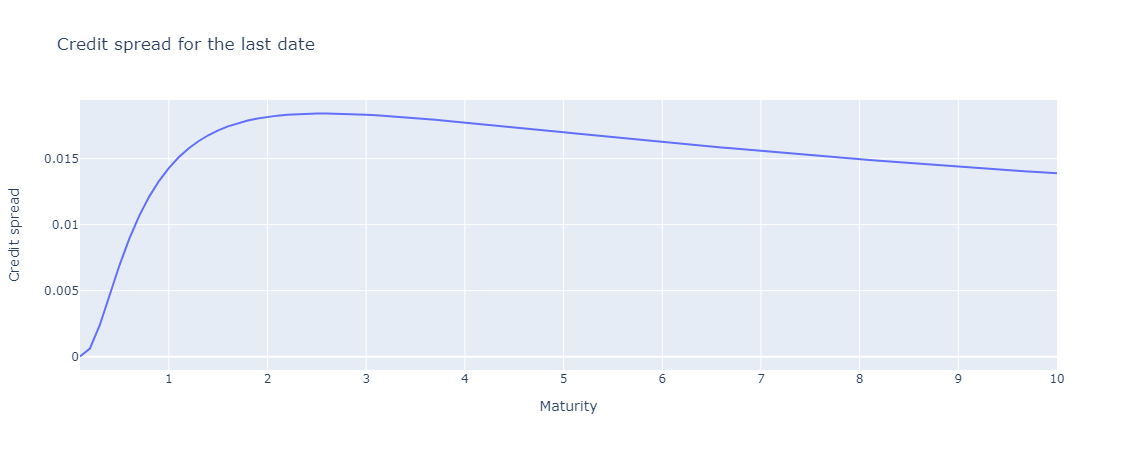

_Case for the first date is below._

In [ ]:
import pandas as pd

E_first,L_first,rf_rate_first=pd.read_csv('merton_data.csv',sep=';',dtype ='a').dropna().iloc[0,:][0:3]

E_first=float(E_first)
L_first=float(L_first)
rf_rate_first=float(rf_rate_first)

In [ ]:
E=E_first
L=L_first
rf_rate=rf_rate_first
T=1/260
def calibration_function1(x):
    """ Takes two values in a form of a list.
        The first element of a list x[0] is the asset value, while 
        the second element of a list x[1] is the asset volatility.
        It returns a minimization function.
        """
        #d1 in from Black sholes

    d1 = (np.log(x[0]/L) + (rf_rate + (x[1]**2 / 2)) * T) / (x[1] * np.sqrt(T))
        #d2 in from Black sholes

    d2 = (np.log(x[0]/L) + (rf_rate - (x[1]**2 / 2)) * T) / (x[1] * np.sqrt(T))
    #equity call option value
    eq=(x[0]*ss.norm.cdf(d1))-(L*np.exp(-rf_rate*T)*ss.norm.cdf(d2))
    #equity volatiliy
    eq_vol=(x[0]/eq)*x[1]*ss.norm.cdf(d1)
    return (eq/E-1)**2+(eq_vol/s_equity-1)**2

In [ ]:
#minimizing the calibration function
res1 = minimize(calibration_function1,(76145,0.2))

#asset value and asset volatility
res1['x'][0],res1['x'][1]

(97504.96935242807, 0.29362453967037927)

In [ ]:
#plotting the credit spread for the fist date 
import plotly.graph_objects as go


fig=go.Figure()
fig.add_trace(go.Scatter(y=credit_spread_function([res1['x'][0],res1['x'][1]],np.arange(0.1,10.1,0.1)),x=np.arange(0.1,10.1,0.1)))

fig.update_layout(
    xaxis_title="Maturity", yaxis_title="Credit spread",title='Credit spread for the fist date'
)

The credit spread for the first date rendered in VS Code Studio is below.

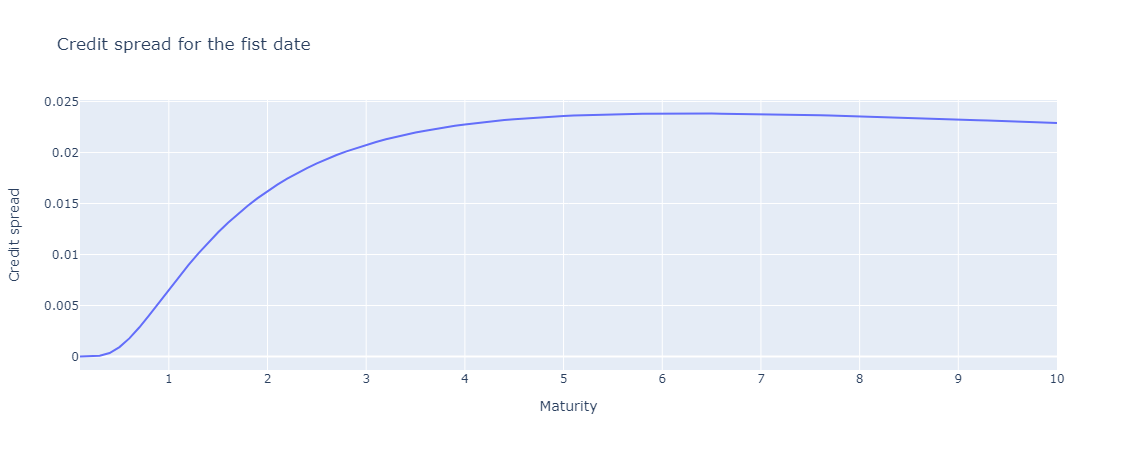

_For both dates combined in one graph._

In [ ]:
#combined graph

fig=go.Figure()
fig.add_trace(go.Scatter(y=credit_spread_function([res1['x'][0],res1['x'][1]],np.arange(0.1,10.1,0.1)),x=np.arange(0.1,10.1,0.1),name='First date'))
fig.add_trace(go.Scatter(y=credit_spread_function([res['x'][0],res['x'][1]],np.arange(0.1,10.1,0.1)),x=np.arange(0.1,10.1,0.1),name='Last date'))

fig.update_layout(
    xaxis_title="Maturity", yaxis_title="Credit spread",title='Credit spread for both dates'
)

Below is the image rendered in VS Code Studio for the same code, which shows  credit spread for both dates.

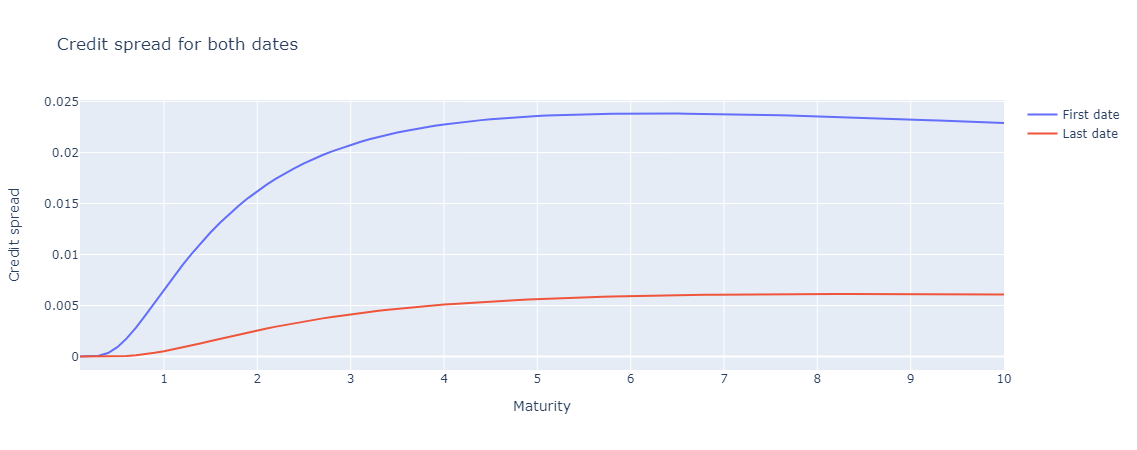